## Импорт библиотек

In [2]:
# Необходимо для корректной работы внешних .py файлов
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from helper import divide_data, evaluate_regression
from plots import plot_feature_importance

c:\Users\Kirill\Desktop\ML_Projects\ml-regression\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# фиксируем состояние генератора псевдослучайных чисел.
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

## 1. Препроцессинг данных

In [6]:
df = pd.read_csv("./kc_house_data.csv")

In [8]:
DATE_FEATURES_LIST = ["date"]

NUMERICAL_FEATURES_LIST = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    "zipcode",
    "lat",
    "long",
    "sqft_living15",
    "sqft_lot15",
    "year",
]

CATEGORICAL_FEATURES_LIST = [
    "waterfront",
    "view",
    "condition",
    "grade",
    "dayofweek",
    "quarter",
    "month",
    "is_month_start",
]

TARGET = "price"

### 1.1 Общие преобразования

In [9]:
df_preprocessed = df.copy()

In [10]:
# Преобразование строки в datetime
df_preprocessed["date"] = pd.to_datetime(
    df_preprocessed["date"], format="%Y%m%dT%H%M%S"
)

df_preprocessed["dayofweek"] = df_preprocessed["date"].dt.dayofweek
df_preprocessed["quarter"] = df_preprocessed["date"].dt.quarter
df_preprocessed["is_month_start"] = pd.to_numeric(
    df_preprocessed["date"].dt.is_month_start
)
df_preprocessed["is_month_start"] = df_preprocessed["is_month_start"].astype(int)
df_preprocessed["month"] = df_preprocessed["date"].dt.month
df_preprocessed["year"] = df_preprocessed["date"].dt.year

df_preprocessed = df_preprocessed.sort_values("date")
df_preprocessed = df_preprocessed.drop(columns=["date"])

# удаляем столбец customerID, поскольку он не несет пользы в дальнейшем исследовании
df_preprocessed = df_preprocessed.drop(columns=["id"])


### 1.2 Разбиение датасета 

In [11]:
# делим данные на признаки и таргет
X, y = divide_data(df_preprocessed, TARGET)

In [12]:
# Разбиваем данные на train и test с соотношением 80 на 20, без перемешивания
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=False,
    random_state=SEED,
)

In [13]:
X_train.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,dayofweek,quarter,is_month_start,month,year
16768,3,2.25,1970,35100,2.0,0,0,4,9,1970,...,98027,47.4635,-121.991,2340,35100,4,2,0,5,2014
9596,3,2.50,2600,4750,1.0,0,0,4,9,1700,...,98117,47.6833,-122.400,2380,4750,4,2,0,5,2014
9587,5,2.50,2820,67518,2.0,0,0,3,8,2820,...,98029,47.5794,-122.025,2820,48351,4,2,0,5,2014
20602,4,2.50,3310,6500,2.0,0,0,3,8,3310,...,98065,47.5150,-121.870,2380,5000,4,2,0,5,2014
11577,4,2.25,2160,8119,1.0,0,0,3,8,1080,...,98006,47.5443,-122.177,1850,9000,4,2,0,5,2014


In [14]:
X_train_preprocessed = X_train.copy()

## 2. Построение базовой модели (Baseline)

In [15]:
X_test_preprocessed = X_test.copy()

In [16]:
feature_names = X_test_preprocessed.columns.to_list()

### 2.1 Dummy Regressor

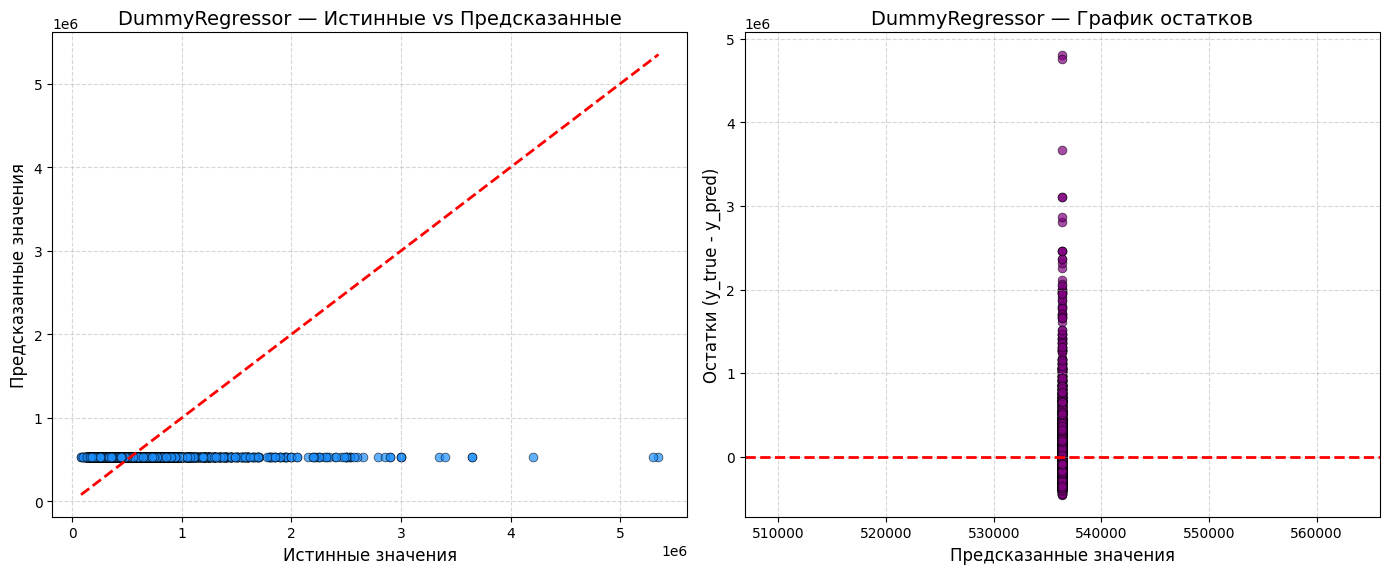


            DUMMYREGRESSOR REGRESSION EVALUATION            

Основные метрики регрессии:
Metric       Value
   MAE 232266.7575
  RMSE 368283.3065
  MAPE      0.4979
    R2     -0.0025



In [17]:
# Задаем и обучаем модель
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train_preprocessed, y_train)

# Получаем предсказания
y_pred = dummy_regressor.predict(X_test_preprocessed)

# Считаем метрики для модели и выводим графики
dummy_regressor_metrics = evaluate_regression(
    y_test=y_test, y_pred=y_pred, model_name="DummyRegressor"
)

### 2.2 Линейная регрессия

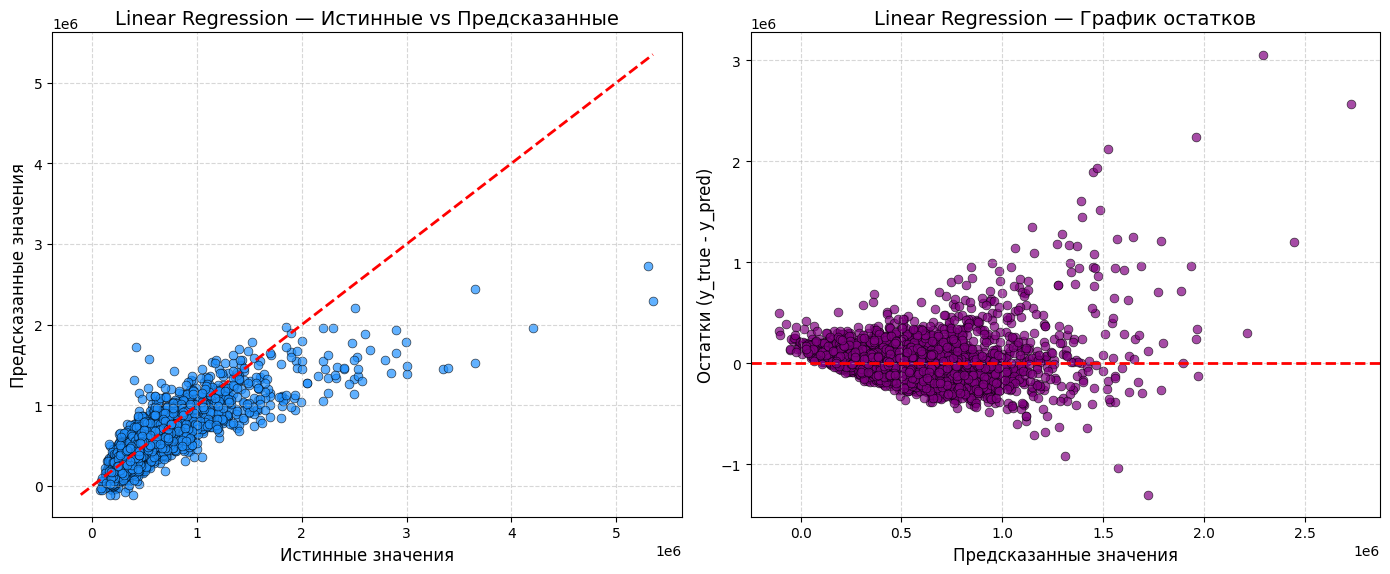


          LINEAR REGRESSION REGRESSION EVALUATION           

Основные метрики регрессии:
Metric       Value
   MAE 129603.9638
  RMSE 208550.1100
  MAPE      0.2511
    R2      0.6785



In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_preprocessed, y_train)

y_pred = lin_reg.predict(X_test_preprocessed)


lin_reg_metrics = evaluate_regression(
    y_test=y_test, y_pred=y_pred, model_name="Linear Regression"
)

c:\Users\Kirill\Desktop\ML_Projects\ml-regression\plots.py:658: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


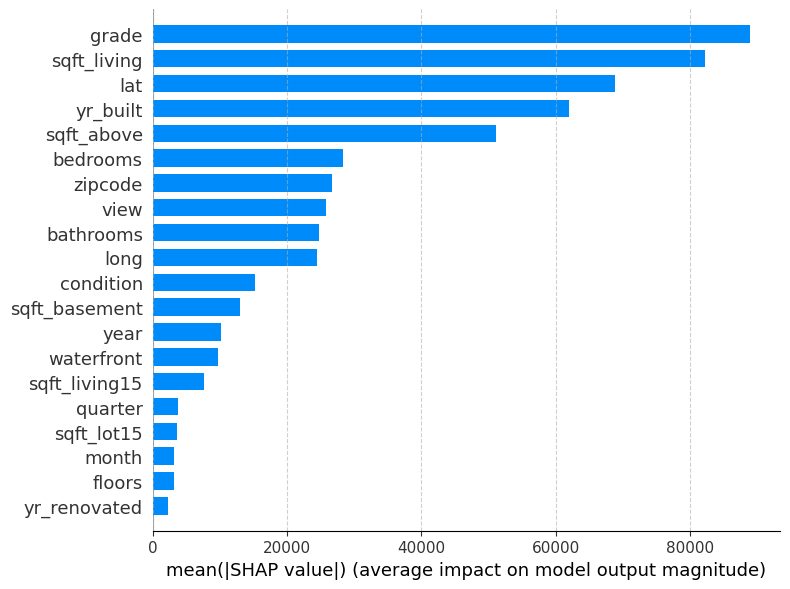

In [23]:
plot_feature_importance(
    lin_reg, X_train_preprocessed, X_test_preprocessed, figsize=(8, 6)
)

На первых местах для логистической регрессии оказались признаки **grade** и **sqft_living** у которых наблюдались сильные корреляции с таргетом **Churn**. Также на третьем местре находится **lat**, значит модель уловила зависимость от местоположения дома.

### 2.3 Дерево решений

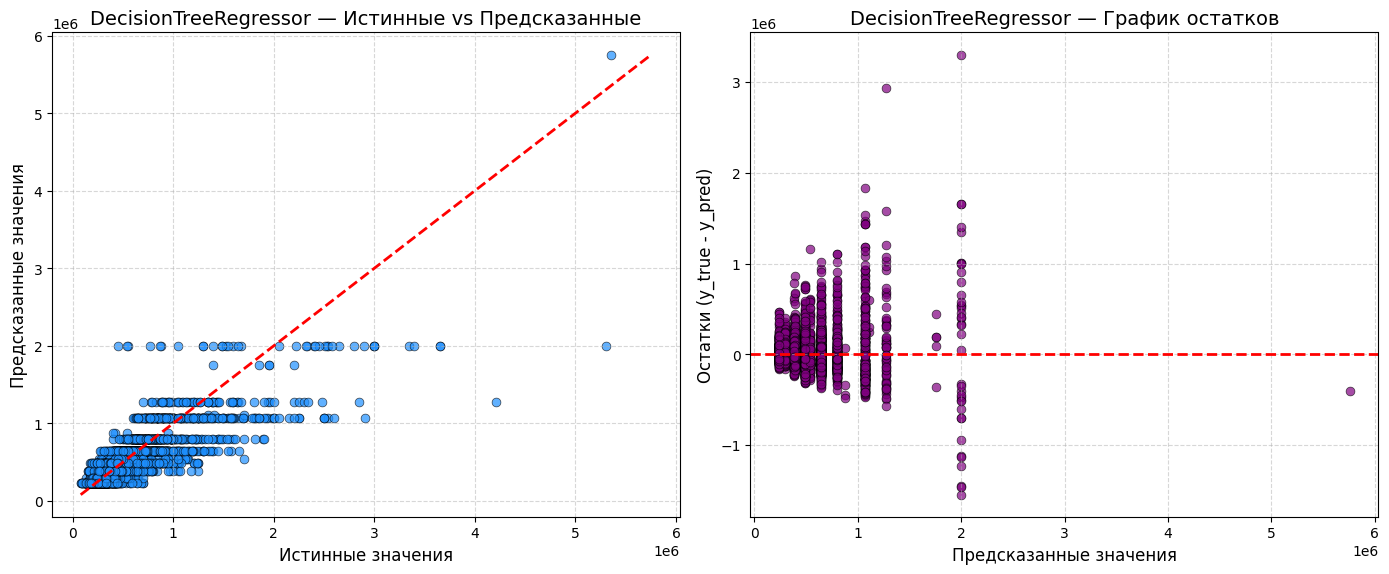


        DECISIONTREEREGRESSOR REGRESSION EVALUATION         

Основные метрики регрессии:
Metric       Value
   MAE 129897.0708
  RMSE 219880.2091
  MAPE      0.2260
    R2      0.6426



In [24]:
decision_tree = DecisionTreeRegressor(random_state=SEED, max_depth=4)
decision_tree.fit(X_train_preprocessed, y_train)

y_pred = decision_tree.predict(X_test_preprocessed)

decision_tree_metrics = evaluate_regression(
    y_test=y_test, y_pred=y_pred, model_name="DecisionTreeRegressor"
)

c:\Users\Kirill\Desktop\ML_Projects\ml-regression\plots.py:658: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


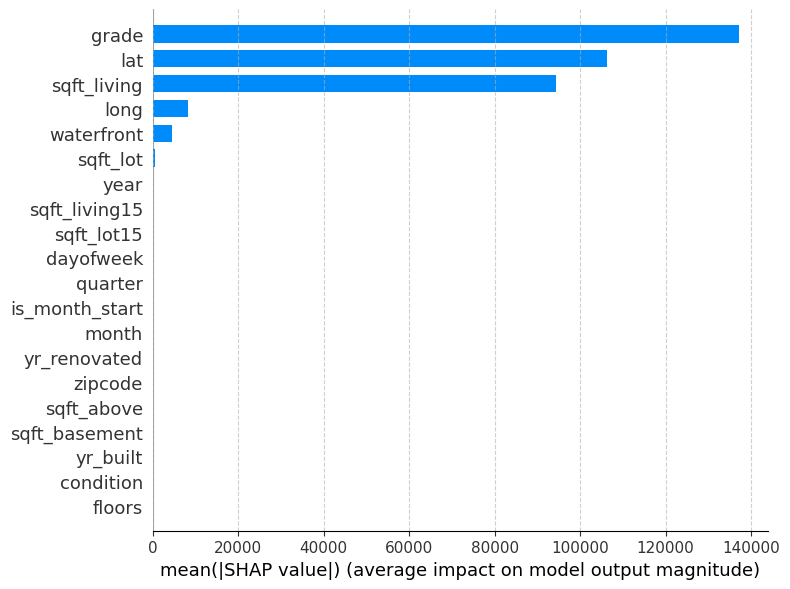

In [25]:
plot_feature_importance(
    decision_tree, X_train_preprocessed, X_test_preprocessed, figsize=(8, 6)
)

У дерева на первых местах тоже наблюдаются **grade**, **sqft_living** и **lat**, однако важность большинства остальных признаков равна нулю

### 2.4 Случайный лес

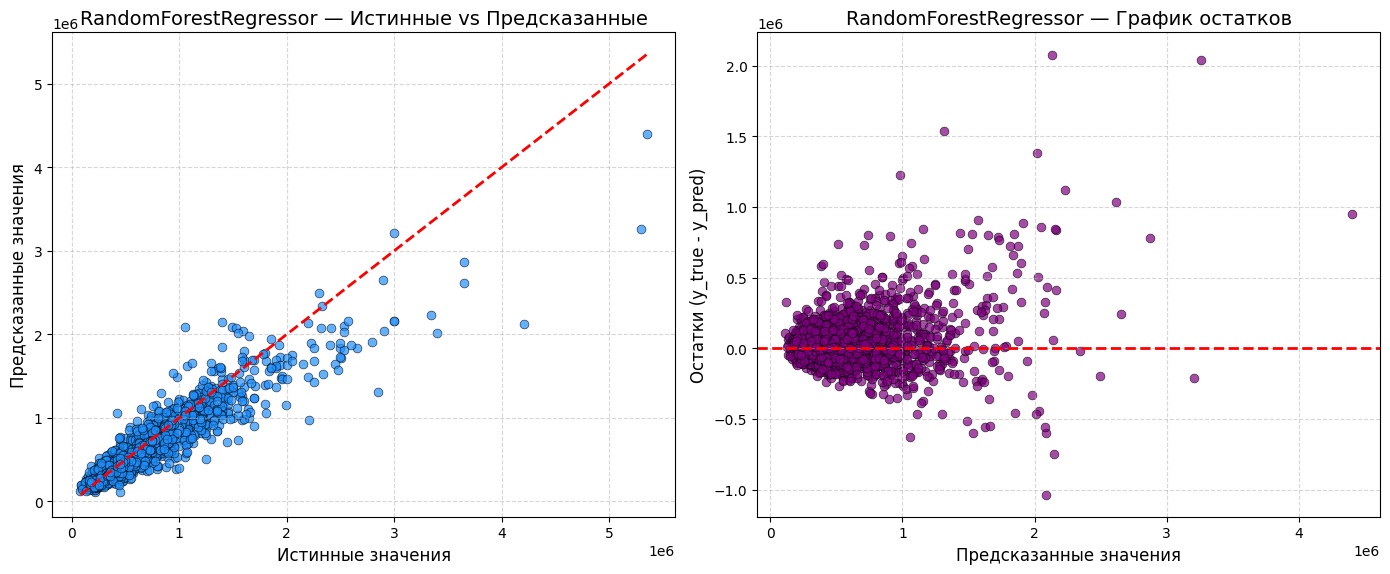


        RANDOMFORESTREGRESSOR REGRESSION EVALUATION         

Основные метрики регрессии:
Metric       Value
   MAE  76798.5230
  RMSE 139449.6835
  MAPE      0.1333
    R2      0.8563



In [26]:
random_forest = RandomForestRegressor(random_state=SEED, n_jobs=-1)
random_forest.fit(X_train_preprocessed, y_train)

y_pred = random_forest.predict(X_test_preprocessed)

random_forest_metrics = evaluate_regression(
    y_test=y_test, y_pred=y_pred, model_name="RandomForestRegressor"
)

 99%|===================| 994/1000 [01:35<00:00]        c:\Users\Kirill\Desktop\ML_Projects\ml-regression\plots.py:658: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


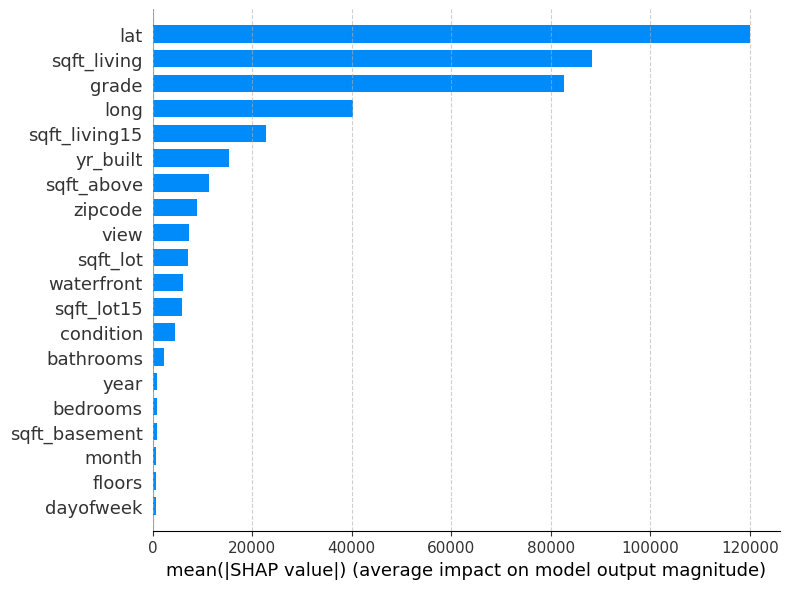

In [27]:
plot_feature_importance(
    random_forest,
    X_train_preprocessed,
    X_test_preprocessed,
    figsize=(8, 6),
)

У случайного леса на первых местах тоже наблюдаются **lat**, **sqft_living** и **grade**. Также в топе появляются **long** и **sqft_living15**. Видимо модель нашла более сложныые закономерности

### 2.5 LGBMRegressor

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2365
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 23
[LightGBM] [Info] Start training from score 536380.070272


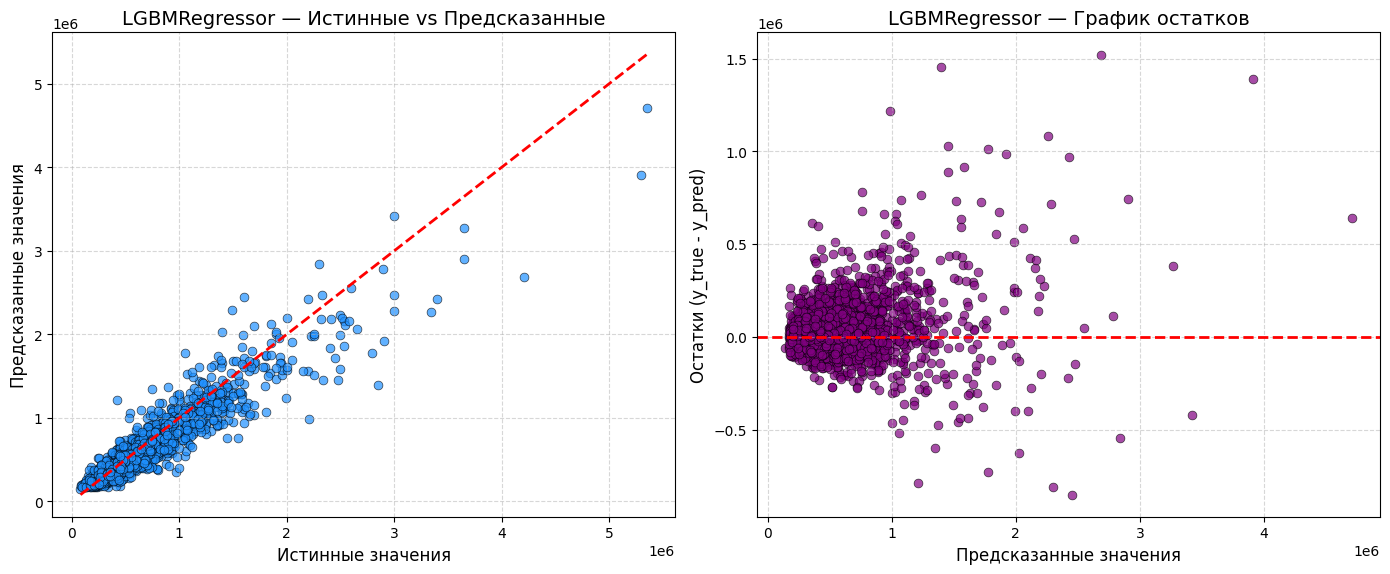


            LGBMREGRESSOR REGRESSION EVALUATION             

Основные метрики регрессии:
Metric       Value
   MAE  74709.1678
  RMSE 128546.8399
  MAPE      0.1319
    R2      0.8779



In [28]:
lgbm = LGBMRegressor(random_state=SEED, n_jobs=-1)
lgbm.fit(X_train_preprocessed, y_train)

y_pred = lgbm.predict(X_test_preprocessed)

lgbm_metrics = evaluate_regression(
    y_test=y_test, y_pred=y_pred, model_name="LGBMRegressor"
)

c:\Users\Kirill\Desktop\ML_Projects\ml-regression\plots.py:658: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


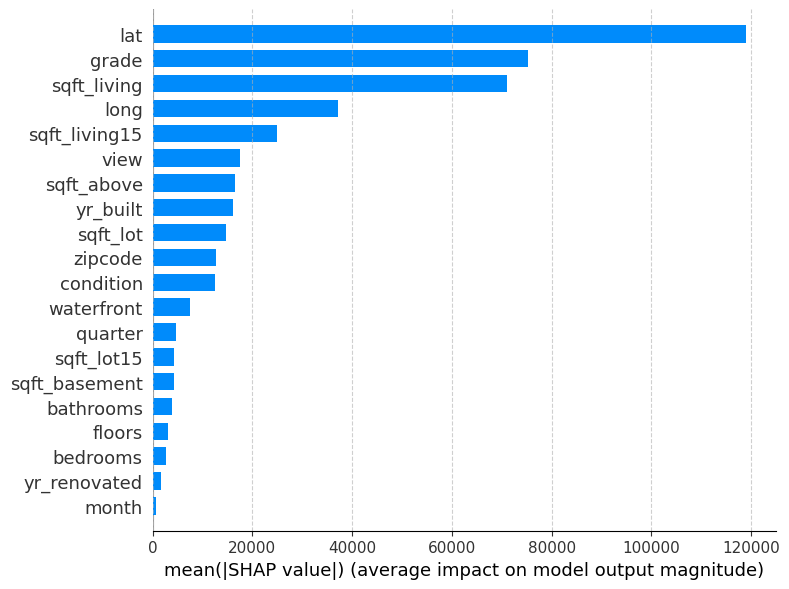

In [29]:
plot_feature_importance(lgbm, X_train_preprocessed, X_test_preprocessed, figsize=(8, 6))

LGBMClassifier также в основном смотрит на **lat**, **grade**, **sqft_living**, **long** и **sqft_living15**. Важность остальных признаков уже не такая маленькая как у случайного леса

### 2.6 CatBoostRegressor

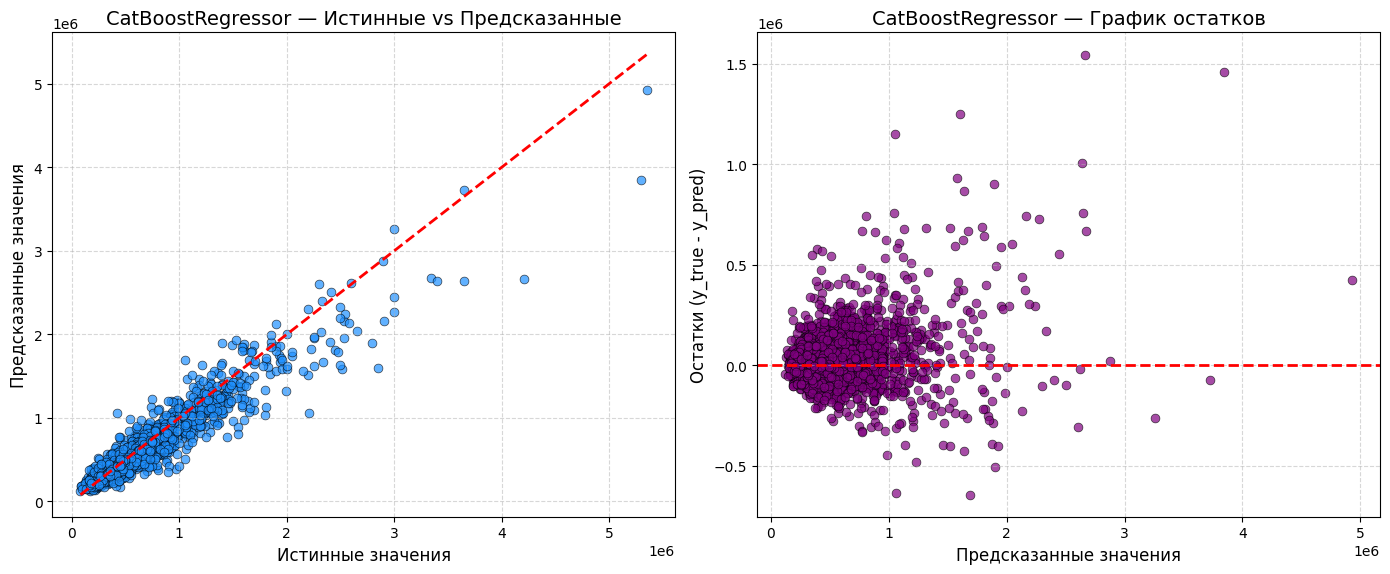


          CATBOOSTREGRESSOR REGRESSION EVALUATION           

Основные метрики регрессии:
Metric       Value
   MAE  68919.8486
  RMSE 118216.6393
  MAPE      0.1239
    R2      0.8967



In [30]:
catboost = CatBoostRegressor(
    random_state=SEED, verbose=0, task_type="CPU", allow_writing_files=False
)

catboost.fit(X_train_preprocessed, y_train)

y_pred = catboost.predict(X_test_preprocessed)

catboost_metrics = evaluate_regression(
    y_test=y_test, y_pred=y_pred, model_name="CatBoostRegressor"
)

 99%|===================| 994/1000 [00:36<00:00]        c:\Users\Kirill\Desktop\ML_Projects\ml-regression\plots.py:658: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


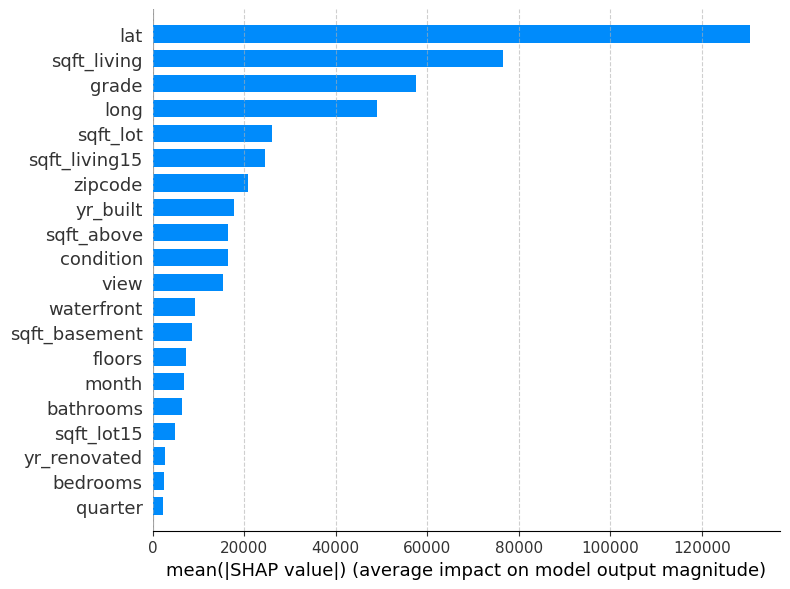

In [31]:
plot_feature_importance(
    catboost, X_train_preprocessed, X_test_preprocessed, figsize=(8, 6)
)

Catboost тоже отдает сильное предпочтение **lat**, **sqft_living**, **grade**, **long**, но разброс важности остальных признаков стал еще меньше чем у прошлых моделей

### 2.7 Финальное сравнение метрик

In [34]:
final_metrics = {
    "dummy_regressor": dummy_regressor_metrics,
    "lin_reg": lin_reg_metrics,
    "decision_tree": decision_tree_metrics,
    "random_forest": random_forest_metrics,
    "lgbm": lgbm_metrics,
    "catboost": catboost_metrics,
}

result = pd.DataFrame(final_metrics.values(), index=final_metrics.keys())

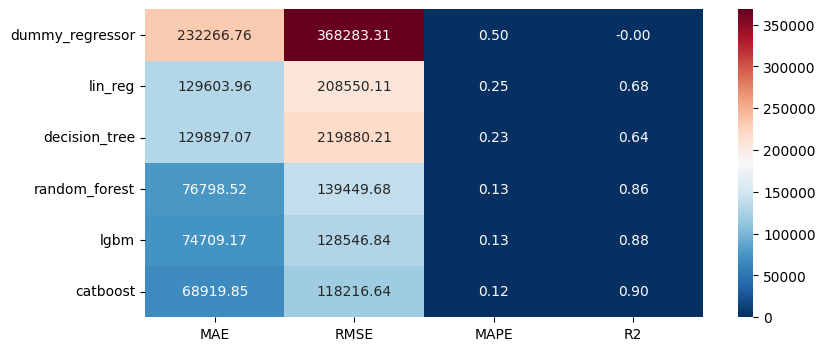

In [35]:
plt.figure(figsize=(9, 4))

sns.heatmap(result, cmap="RdBu_r", annot=True, fmt=".2f")
plt.show()

По метрикам хуже всех показал себя dummy_regressor. 

Достаточно хорошо показали себя модели Случайного леса, lgbm и catboost.

Самой лучшей моделью оказался Catboost (R2 - 0.9, MAPE - 0.12).